In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# df = pd.read_csv('./Data/gr_Div_DG_standardized_ByNoDrug.csv')
df = pd.read_csv('./Data/gr_DG_checkerboard_normalized.csv')
df = df.iloc[1:]
# df = pd.read_csv('./Data/gr_Div_SG.csv')

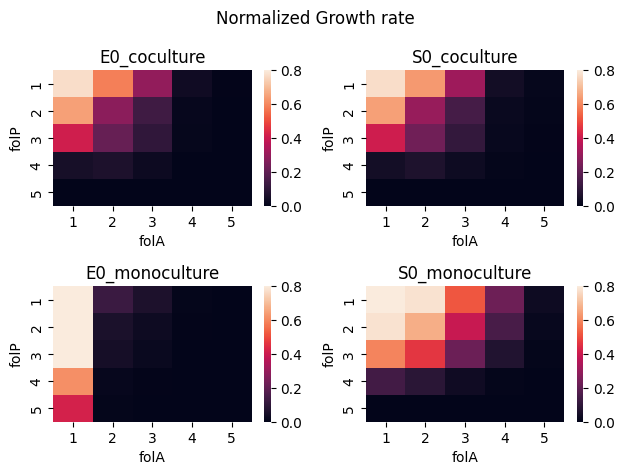

In [9]:
alpha_lvs = df.Gene_inhibition.str.split('_').apply(lambda x: x[1])
df['folP'] = alpha_lvs.str.split('.').str[0]
df['folA'] = alpha_lvs.str.split('.').str[1]

plot_columns = ['E0_coculture', 'S0_coculture', 'E0_monoculture', 'S0_monoculture']
# plot_columns = ['po_diff_'+ ele for ele in plot_columns]
for i, col in enumerate(plot_columns):
    ax = plt.subplot(2, 2, i+1)
    plt.title(col)
    plot_df = df.pivot(index='folP', columns='folA', values=col)
    plot_df = plot_df.fillna(0)  # Fill NA cells with 0
    sns.heatmap(data=plot_df, vmax=.8, vmin=0)

plt.suptitle('Normalized Growth rate')
plt.tight_layout()

# Plots of transition from folA dose lv 1 to lv2

<Axes: xlabel='cycle'>

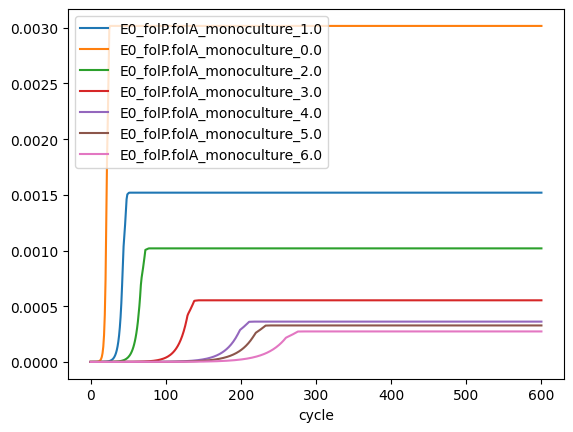

In [14]:
# df.plot(x='cycle', y=list(gen_colnames([0.0, 1.0,2.0,3.0])))
# df = pd.read_csv('./Data/checkerboard_run2.csv',index_col='cycle')
culture = 'monoculture'
def gen_colnames(l=[0.0, 0.1], culture='coculture'):
    return chain(*[[f'E0_folP.folA_{culture}_'+str(ele),]  for ele in l])

df.plot( y=list(gen_colnames([1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0], culture='monoculture')))

In [8]:
df.columns

Index(['Unnamed: 0', 'Gene_inhibition', 'E0_coculture', 'S0_coculture',
       'Predicted_additive_effect_E0_coculture',
       'Predicted_additive_effect_S0_coculture', 'E0_monoculture',
       'S0_monoculture', 'Predicted_additive_effect_E0_monoculture',
       'Predicted_additive_effect_S0_monoculture', 'First_gene',
       'E0_coculture_first_gene', 'S0_coculture_first_gene',
       'E0_monoculture_first_gene', 'S0_monoculture_first_gene', 'Second_gene',
       'E0_coculture_second_gene', 'S0_coculture_second_gene',
       'E0_monoculture_second_gene', 'S0_monoculture_second_gene',
       'po_diff_E0_coculture', 'po_diff_S0_coculture',
       'po_diff_E0_monoculture', 'po_diff_S0_monoculture'],
      dtype='object')

In [6]:
from itertools import chain
culture = 'coculture'
culture = 'monoculture'
def gen_colnames(l=[0.0, 0.1], culture='coculture'):
    return chain(*[[f'E0_folP.folA_{culture}_'+str(ele), f'S0_folP.folA_{culture}_'+str(ele)] for ele in l])

for val in range(0,6):
    df.plot(x='cycle', y=list(gen_colnames([val+.1, val+.2])))
    # plt.xlim(500, 520)
    plt.figure()

KeyError: 'cycle'